<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/CIFAR10_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import layers
from keras.datasets.cifar10 import load_data

In [30]:
(X_train, _), (X_test, _) = load_data()

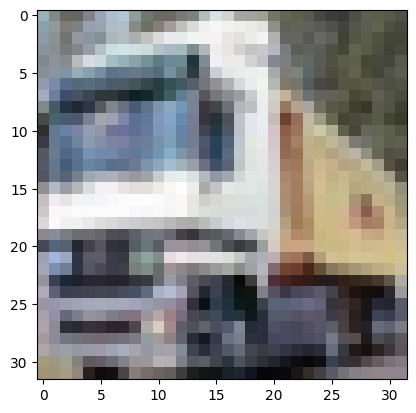

In [31]:
plt.imshow(X_train[1]);

In [32]:
X_test.max()

255

In [33]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [34]:
X_test.max()

1.0

In [35]:
X_train.shape

(50000, 32, 32, 3)

In [36]:
IMG_SHAPE = X_train[0].shape
IMG_SHAPE

(32, 32, 3)

In [37]:
input_layer = keras.Input(shape=IMG_SHAPE)

# encoder

x = layers.Conv2D(16, kernel_size=(2, 2), padding='same')(input_layer)
x = layers.MaxPool2D((2, 2), padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(8, kernel_size=(2, 2), padding='same')(x)
x = layers.MaxPool2D((2, 2), padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(8, kernel_size=(2, 2), padding='same')(x)
encoded = layers.MaxPool2D((2, 2), padding='same')(x)

# decoder

x = layers.Conv2D(8, kernel_size=(2, 2), padding='same')(encoded)
x = layers.UpSampling2D(size=(2, 2))(x)
x = layers.Conv2D(8, kernel_size=(2, 2), padding='same')(x)
x = layers.UpSampling2D(size=(2, 2))(x)
x = layers.Conv2D(16, kernel_size=(2, 2), padding='same')(x)
x = layers.UpSampling2D(size=(2, 2))(x)
decoded = layers.Conv2D(3, (2, 2), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_layer, decoded)

In [38]:
autoencoder.compile(
    optimizer='adam',
    loss='binary_crossentropy'
)

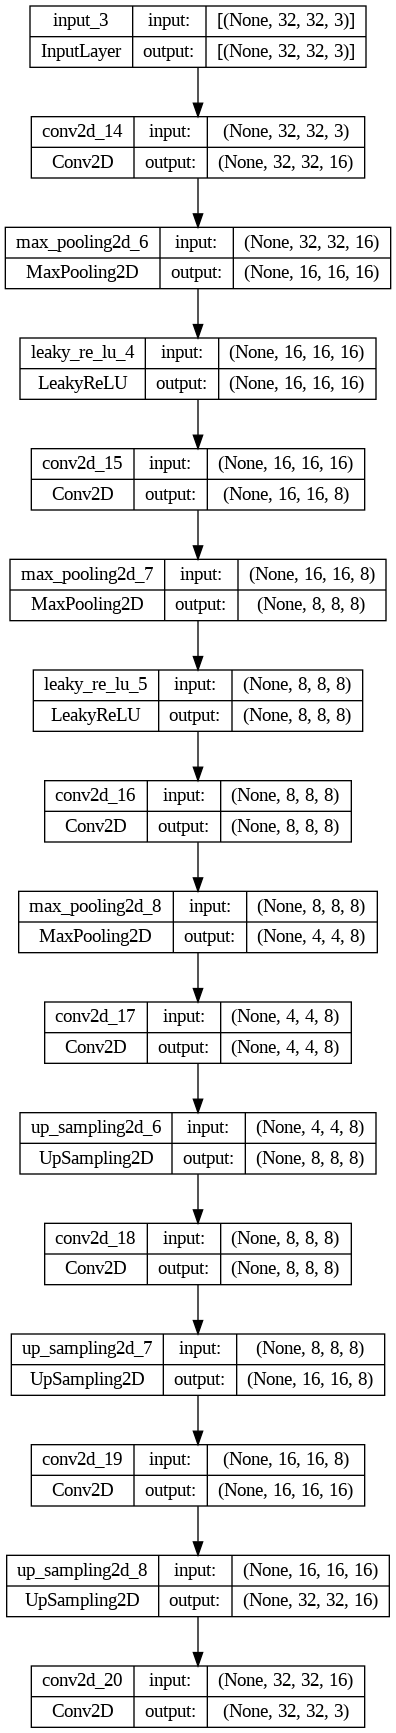

In [39]:
keras.utils.plot_model(autoencoder, show_shapes=True)

In [48]:
autoencoder.fit(
    X_train, X_train,
    validation_data=(X_test, X_test),
    epochs=10,
    batch_size=64,
    verbose=2,
    shuffle=True
)

Epoch 1/10
782/782 - 5s - loss: 0.5852 - val_loss: 0.5861 - 5s/epoch - 7ms/step
Epoch 2/10
782/782 - 5s - loss: 0.5851 - val_loss: 0.5860 - 5s/epoch - 7ms/step
Epoch 3/10
782/782 - 5s - loss: 0.5850 - val_loss: 0.5860 - 5s/epoch - 6ms/step
Epoch 4/10
782/782 - 4s - loss: 0.5849 - val_loss: 0.5858 - 4s/epoch - 6ms/step
Epoch 5/10
782/782 - 5s - loss: 0.5848 - val_loss: 0.5857 - 5s/epoch - 6ms/step
Epoch 6/10
782/782 - 5s - loss: 0.5847 - val_loss: 0.5856 - 5s/epoch - 6ms/step
Epoch 7/10
782/782 - 5s - loss: 0.5847 - val_loss: 0.5855 - 5s/epoch - 6ms/step
Epoch 8/10
782/782 - 4s - loss: 0.5846 - val_loss: 0.5854 - 4s/epoch - 6ms/step
Epoch 9/10
782/782 - 5s - loss: 0.5845 - val_loss: 0.5855 - 5s/epoch - 6ms/step
Epoch 10/10
782/782 - 5s - loss: 0.5845 - val_loss: 0.5856 - 5s/epoch - 6ms/step


In [49]:
pred = autoencoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [50]:
import numpy as np

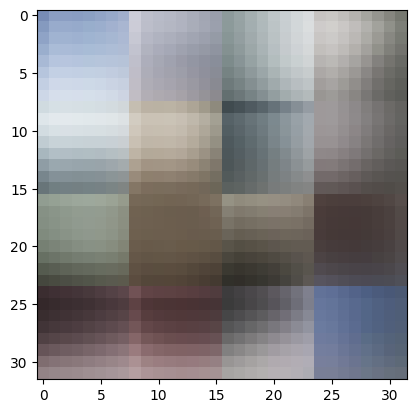

In [57]:
n = 1
indx = np.random.choice(len(pred), n)

plt.imshow(pred[indx][0]);

IT's MODERN ART<br>
You will understand it later...